# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Definitions

In [2]:
base_path = "C:/Users/Zi/Documents/data-science-crossfit/"

# Model Building

In [3]:
df_games_and_open = pd.read_csv(base_path + "csv_files/version_2_clean_data/df_games_and_open.csv")
df_games_and_open = df_games_and_open[df_games_and_open['year'] != 2023]
df_games_and_open = df_games_and_open.select_dtypes(include=[np.number]).drop(columns=['year','overallRank'])

In [4]:
df_games_and_open

,competitorId,genderId,age,ageNull,height,heightNull,weight,weightNull,bmi,bmiNull,affiliateId,countryOfOriginCode,regionId,statusId,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
0,1616,1,20,0,178.000000,0,83.000000,0,26.196187,0,0,0,0,1,232,0,140133,604776,1,0
1,1616,1,21,0,178.000000,0,83.000000,0,26.196187,0,0,0,0,1,21,0,140133,604776,2,0
2,1685,1,29,0,163.000000,0,82.000000,0,30.863036,0,0,0,0,1,19,0,140133,604776,1,0
3,1690,1,23,0,181.000000,0,93.000000,0,28.387412,0,7104,1,1,1,483,1,17,566,1,1
4,1690,1,25,0,181.000000,0,93.000000,0,28.387412,0,7104,1,1,1,702,1,3,86,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,2377148,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,1,237,0,140133,604776,1,1
1710,2377149,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,162,0,140133,604776,1,1
1711,2377150,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,81,0,140133,604776,1,1
1712,2377151,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,76,0,140133,604776,1,1


### Splits

#####  X and y

In [5]:
X = df_games_and_open.copy()
y = X.pop('overallScore')

In [6]:
X.shape

(1633, 19)

In [7]:
y.shape

(1633,)

##### Train and test

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [9]:
train_X.shape

(1306, 19)

In [10]:
train_y.shape

(1306,)

In [11]:
val_X.shape

(327, 19)

In [12]:
val_y.shape

(327,)

### Linear Regressions

##### Decision tree

In [13]:
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(train_X, train_y)
decision_tree_predictions = decision_tree_model.predict(val_X)
mean_absolute_error(val_y, decision_tree_predictions)

142.43119266055047

In [14]:
mean_absolute_percentage_error(val_y, decision_tree_predictions)

4.218509375729611e+16

In [15]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in range(5, 100, 5):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  120
Max leaf nodes: 10  		 Mean Absolute Error:  112
Max leaf nodes: 15  		 Mean Absolute Error:  114
Max leaf nodes: 20  		 Mean Absolute Error:  111
Max leaf nodes: 25  		 Mean Absolute Error:  114
Max leaf nodes: 30  		 Mean Absolute Error:  113
Max leaf nodes: 35  		 Mean Absolute Error:  114
Max leaf nodes: 40  		 Mean Absolute Error:  111
Max leaf nodes: 45  		 Mean Absolute Error:  112
Max leaf nodes: 50  		 Mean Absolute Error:  114
Max leaf nodes: 55  		 Mean Absolute Error:  117
Max leaf nodes: 60  		 Mean Absolute Error:  118
Max leaf nodes: 65  		 Mean Absolute Error:  118
Max leaf nodes: 70  		 Mean Absolute Error:  118
Max leaf nodes: 75  		 Mean Absolute Error:  118
Max leaf nodes: 80  		 Mean Absolute Error:  117
Max leaf nodes: 85  		 Mean Absolute Error:  117
Max leaf nodes: 90  		 Mean Absolute Error:  117
Max leaf nodes: 95  		 Mean Absolute Error:  121


In [16]:
scores = {max_leaf_nodes: get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) for max_leaf_nodes in range(5, 100, 1)}
best_tree_size = min(scores, key=scores.get)
best_tree_size

20

##### Random forest

In [17]:
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
random_forest_predictions = random_forest_model.predict(val_X)
mean_absolute_error(val_y, random_forest_predictions)

102.04559633027525

In [18]:
mean_absolute_percentage_error(val_y, random_forest_predictions)

4.861325917038146e+16

In [19]:
model_1 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1)
model_2 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)
models = [model_1, model_2, model_3]

def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    prediction = model.predict(X_v)
    return mean_absolute_error(y_v, prediction)

for i in range(0, len(models)):
    mae = score_model(models[i], train_X, val_X, train_y, val_y)
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 101
Model 2 MAE: 100
Model 3 MAE: 102


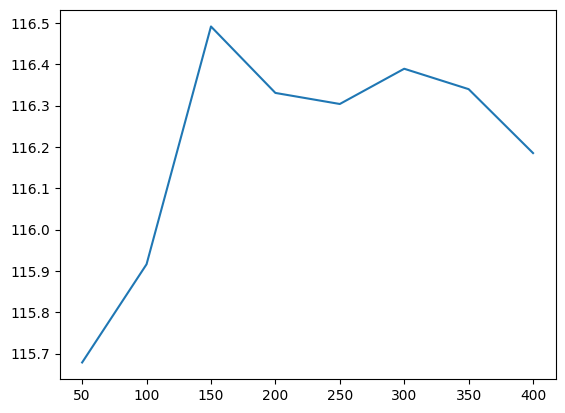

In [20]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators, random_state=1))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range (1,9):
    results[50*i] = get_score(50*i)

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [21]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

50

##### XGB Regressor

In [22]:
xgb_model = XGBRegressor(random_state=1)
xgb_model.fit(train_X, train_y)
xgb_predictions = xgb_model.predict(val_X)
mean_absolute_error(val_y, xgb_predictions)

111.19990013444095

In [23]:
mean_absolute_percentage_error(val_y, xgb_predictions)

4.446744368731317e+16

In [24]:
xgb_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_model_2.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
xgb_predictions_2 = xgb_model_2.predict(val_X)
mean_absolute_error(val_y, xgb_predictions_2)

C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


101.39193116707175